Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


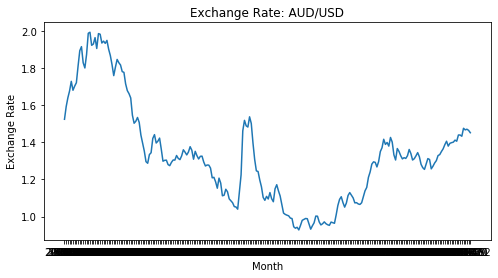

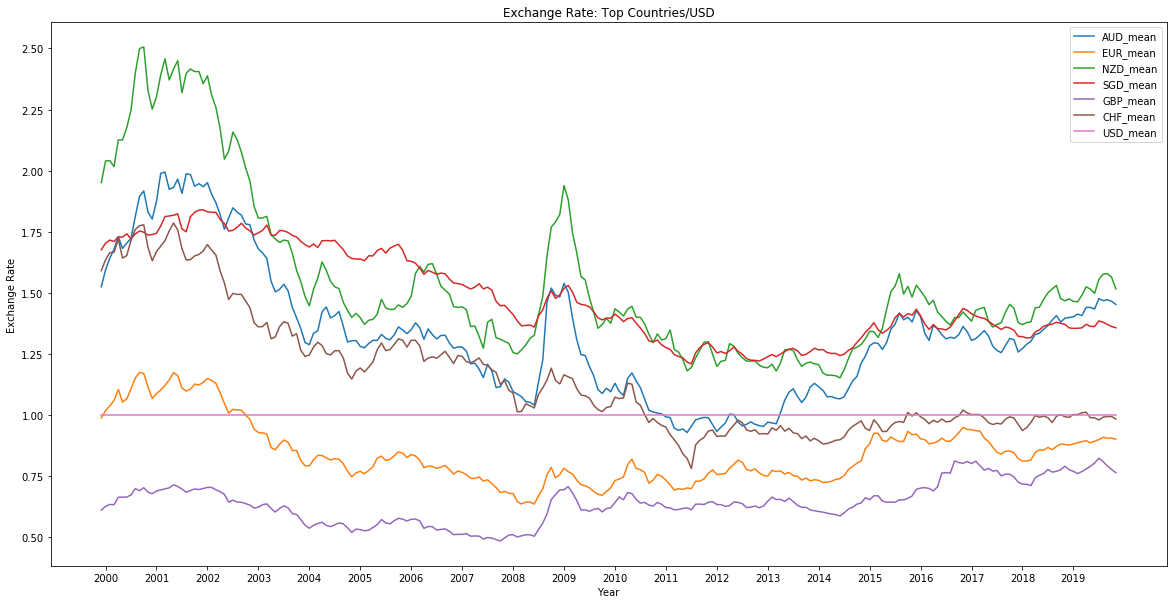

Loading BokehJS ...

      AUD_USD  SGD_USD
0      1.5172   1.6563
1      1.5239   1.6535
2      1.5267   1.6560
3      1.5291   1.6655
4      1.5272   1.6625
...       ...      ...
5010   1.4445   1.3550
5011   1.4411   1.3540
5012   1.4331   1.3520
5013   1.4278   1.3483
5014   1.4225   1.3446

[5015 rows x 2 columns]
18.44622546977485
stat=0.899, p=0.056
Probably Gaussian
stat=0.883, p=0.029
Probably not Gaussian
stat=0.122, p=0.629
Probably independent
stat=-2.164, p=0.038
Probably different distributions
0.0375838341
[1.42759002 1.43493561 1.40922605 1.28496315 1.36454037 1.35474625
 1.3669889  1.38841354]
R-squared of training data is: 0.6947623687482268
R-squared of testing data is: 0.6776295453826162
R-squared of the entire dataset is: 0.720032833933373


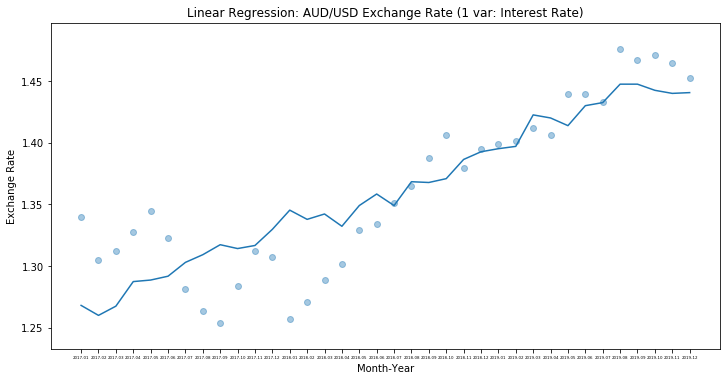

['0.1460', '0.1432', '0.1497', '0.1692', '0.2010', '0.2395', '0.2747', '0.2969', '0.3030', '0.3025', '0.3085', '0.3293', '0.3588', '0.3842', '0.3919', '0.3747', '0.3297', '0.2583', '0.1686', '0.0701', '-0.0283', '-0.1212', '-0.2047', '-0.2754', '-0.3293', '-0.3629', '-0.3751', '-0.3705', '-0.3559', '-0.3377', '-0.3206', '-0.3075', '-0.3003', '-0.2996', '-0.3057', '-0.3182']
0.8720883850071524


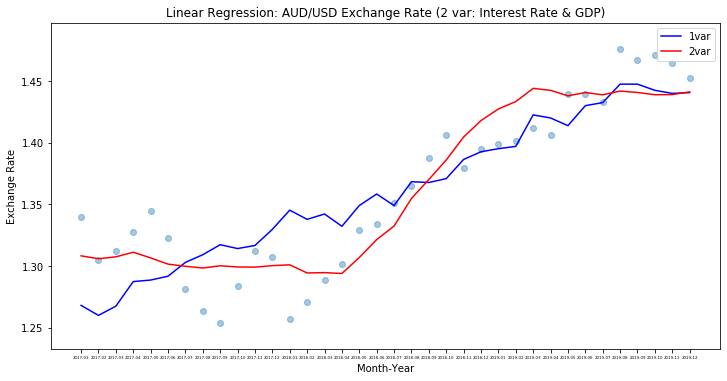

0.8735331474821529


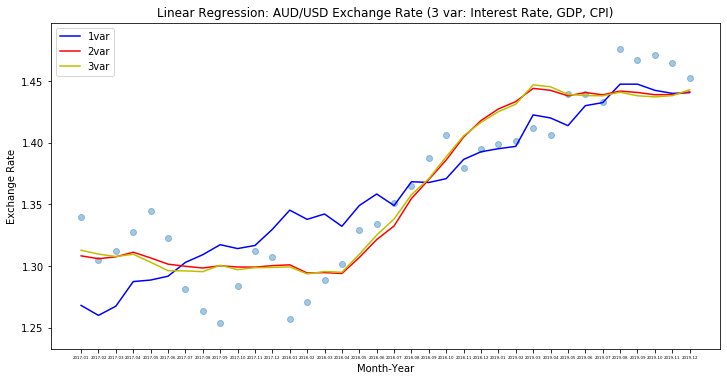

['1.1049', '1.5569', '1.5852', '1.3909', '1.3773', '1.4156', '1.2700', '1.3390', '1.5011', '1.3424', '1.4384', '1.6143', '1.4627', '1.6988', '1.6145', '1.8452', '1.5477', '1.6628', '1.6205', '1.6746', '1.4033', '1.4193', '1.2982', '1.1261', '1.2693', '1.2660', '1.5775', '1.6893', '1.6890', '1.6503', '1.7533', '1.8396', '1.8146', '1.8720', '1.7240', '1.5248']
[1.29968787 1.32378504 1.32525747 1.31398611 1.30755413 1.30301186
 1.29020524 1.29082406 1.29980318 1.29072335 1.29525475 1.30302309
 1.29159361 1.29873334 1.29334076 1.30767801 1.30219049 1.32309064
 1.33593521 1.35998795 1.3631849  1.38168585 1.39279783 1.39734783
 1.41553044 1.42183466 1.44500294 1.44991259 1.44626614 1.44320987
 1.44607534 1.45063089 1.44792988 1.45020224 1.44283691 1.43431186]
0.8889382199971628


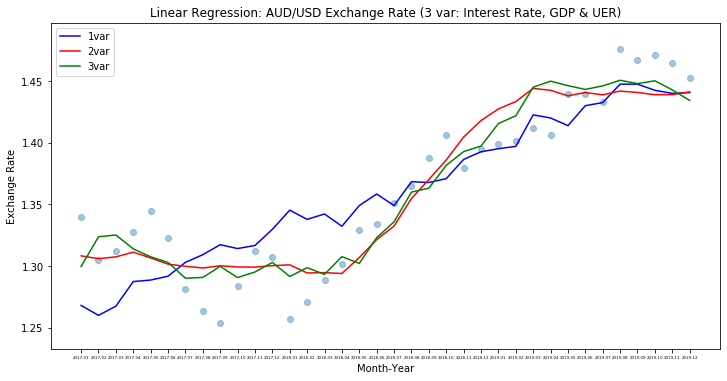

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-010', '2020-011', '2020-012']
0.9998889832100238


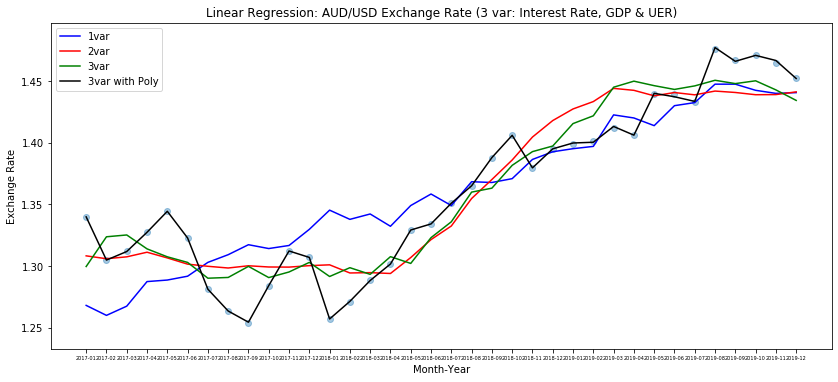

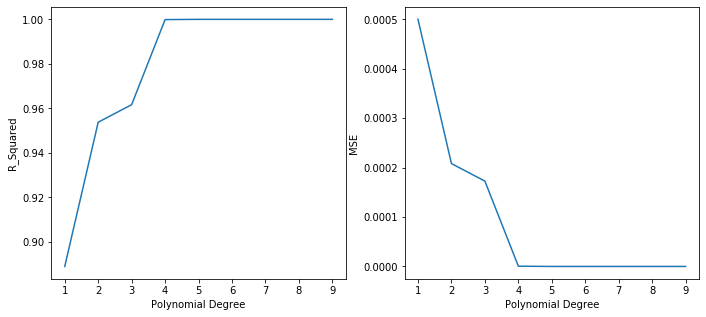

0.8889378781766654
0.8703105846376484


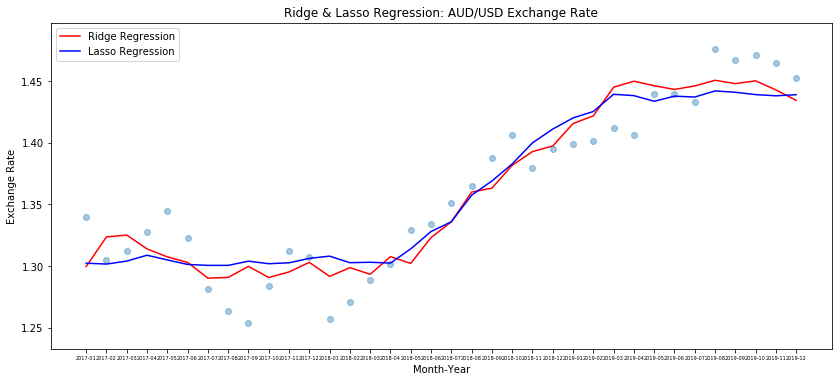

In [1]:
%run exchange-rate-prediction-part2.ipynb

In [2]:
#4. Predict future values using ARIMA model

#Test whether the data is stationary to be able to use ARIMA model or not

#4.1 Stationary Testing using ADF Test
#H0: Dataset is not stationary
#H1: Dataset is stationary
 
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(y_pred)
print('stat=%.3f, p=%.3f' % adf_test[0:2])
if adf_test[1] > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-0.434, p=0.904
Probably not Stationary


In [3]:
#4.2 Stationary Testing using KPSS Test
#H0: Dataset is stationary
#H1: Dataset is not stationary

from statsmodels.tsa.stattools import kpss

kpss_test = kpss(y_pred, nlags='auto')

print('stat=%.3f, p=%.3f' % kpss_test[0:2])
if kpss_test[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably Not Stationary')

stat=0.692, p=0.014
Probably Not Stationary


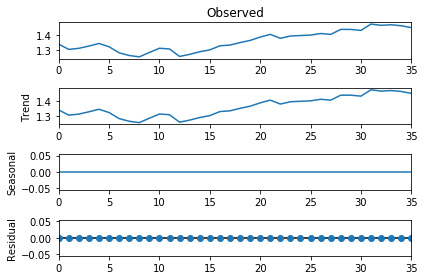

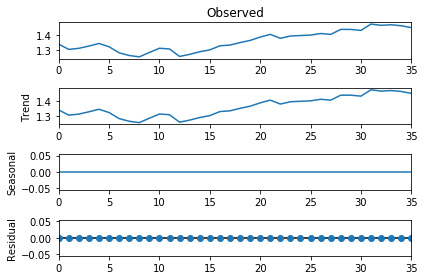

In [4]:
#4.3 Stationary Testing using Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

y_pred_list = y_pred.tolist()
result = seasonal_decompose(y_pred_list, model='additive', period=1)

result.plot()

In [5]:
date = list(range(1,37))
date_fx = pd.DataFrame(zip(date, y_pred_list), columns=['Date', 'FX'])

#Transformation: To stabilize the non-constant variance, use power transform, square root or log transform
date_fx_log = np.log(date_fx)

In [6]:
#make the data stationary before using AROMA by DIFFERENCING 
#apply time shifting by substracting every point by the one that preceded it

date_fx_log_diff = date_fx_log - date_fx_log.shift(1)
date_fx_log_diff.dropna(inplace=True)

y_stationary = date_fx_log_diff.iloc[:,1]

In [7]:
#Stationary Testing after Differencing

#a. ADF Test

adf_test_2 = adfuller(y_stationary)
print('stat=%.3f, p=%.3f' % adf_test_2[0:2])
if adf_test_2[1] > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

#b. KPSS Test
kpss_test_2 = kpss(y_stationary, nlags='auto')

print('stat=%.3f, p=%.3f' % kpss_test_2[0:2])
if kpss_test_2[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably Not Stationary')


stat=-5.316, p=0.000
Probably Stationary
stat=0.192, p=0.100
Probably Stationary


/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


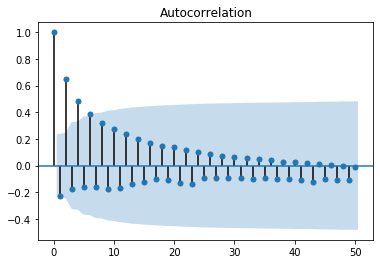

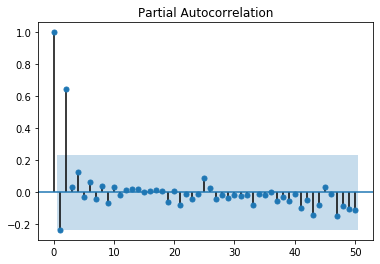

In [8]:
#4.4 Find the best (p,d,q) for ARIMA model through ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

date_fx_log_diff = date_fx_log_diff.values.reshape(-1)

plot_acf(date_fx_log_diff, lags=50)
plot_pacf(date_fx_log_diff, lags=50)

plt.show()

#https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/autocorrelation/interpret-the-results/autocorrelation-function-acf/
#Large spike at lag 1 followed by a decreasing wave that alternates between positive and negative correlations
#This indicates a higher order autoregressive term in the data
#Use the PACF to determine AR (p)
#But use ACF to determine MA (q)

#https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/
#Significant correlations at first lag, followed by correlations not signification 
#=> # of significant correlations =  AR (p = 2)

In [42]:
#ARIMA Forecasting

from statsmodels.tsa.arima_model import ARIMA

y = date_fx_log.iloc[:, 1]

#(p, d, q) = (3, 1, 2)
model_arima = ARIMA(y, (3,1,2))
model_arima_fit = model_arima.fit(disp=0)
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  98.613
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sun, 31 May 2020   AIC                           -183.227
Time:                        17:00:52   BIC                           -172.339
Sample:                             1   HQIC                          -179.469
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.909      0.363      -0.003       0.007
ar.L1.D.FX     1.3808      0.204      6.762      0.000       0.981       1.781
ar.L2.D.FX    -1.2038      0.209     -5.755      0.0

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [43]:
#(p, d, q) = (2, 1, 2)
model_arima = ARIMA(y, (2,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  97.548
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 31 May 2020   AIC                           -183.096
Time:                        17:01:50   BIC                           -173.764
Sample:                             1   HQIC                          -179.875
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      2.146      0.032       0.000       0.006
ar.L1.D.FX     0.2524      0.243      1.037      0.300      -0.224       0.729
ar.L2.D.FX     0.5284      0.238      2.218      0.0

In [46]:
#(p, d, q) = (1,1,1)
model_arima = ARIMA(y, (1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  96.946
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 31 May 2020   AIC                           -185.892
Time:                        17:08:35   BIC                           -179.671
Sample:                             1   HQIC                          -183.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.780      0.435      -0.003       0.008
ar.L1.D.FX    -0.6433      0.228     -2.827      0.005      -1.089      -0.197
ma.L1.D.FX     0.8702      0.138      6.304      0.0

In [47]:
#Use a for loop to find the best combination of (p, d, q) for ARIMA

import itertools

p = range(1, 4)
d = range(1, 2)
q = range(1, 3)

pdq = list(itertools.product(p, d, q))

aics = []
params = []

for param in pdq:
    model = ARIMA(y, order=param)
    model_fit = model.fit()
    aic = model_fit.aic
    aics.append(aic)
    params.append(param)

combo = list(zip(aics, params))
combo.sort()

combo_array = np.array(combo)
print(combo_array)

[[-185.89207442289208 (1, 1, 1)]
 [-184.12648371945969 (1, 1, 2)]
 [-183.8060442037786 (2, 1, 1)]
 [-183.22690501786545 (3, 1, 2)]
 [-183.0964649299443 (2, 1, 2)]
 [-182.18614418891488 (3, 1, 1)]]


/opt/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [48]:
model_arima = ARIMA(y, (1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.FX   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  96.946
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 31 May 2020   AIC                           -185.892
Time:                        17:08:38   BIC                           -179.671
Sample:                             1   HQIC                          -183.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.003      0.780      0.435      -0.003       0.008
ar.L1.D.FX    -0.6433      0.228     -2.827      0.005      -1.089      -0.197
ma.L1.D.FX     0.8702      0.138      6.304      0.0

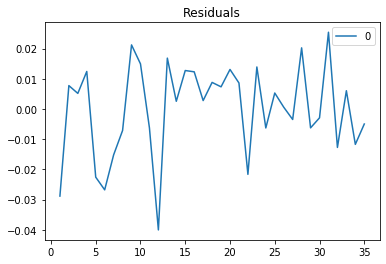

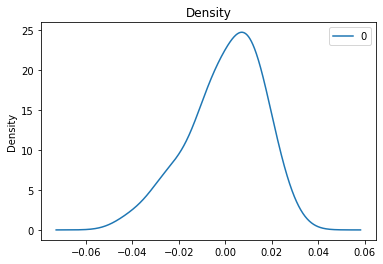

In [49]:
residuals = pd.DataFrame(model_arima_fit.resid)

residuals.plot(title='Residuals')
residuals.plot(kind='kde', title='Density')

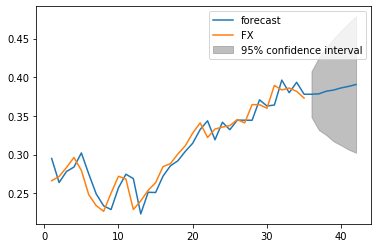

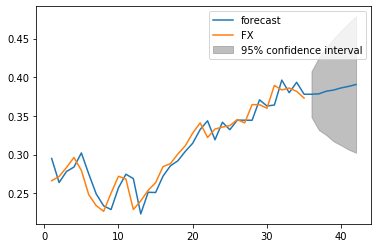

In [50]:
pred = model_arima_fit.forecast(12,alpha=0.05)[0]
model_arima_fit.plot_predict(1, 42)

In [51]:
pred_month = np.array(list(zip(month_year_future, pred)))
print(pred_month)

[['2020-01' '0.3780000501141841']
 ['2020-02' '0.3785236765426517']
 ['2020-03' '0.38190547711018275']
 ['2020-04' '0.3834484885218199']
 ['2020-05' '0.386174473886521']
 ['2020-06' '0.38813940006771425']
 ['2020-07' '0.39059394910095885']
 ['2020-08' '0.3927335022147719']
 ['2020-09' '0.3950757060603529']
 ['2020-010' '0.3972875357755001']
 ['2020-011' '0.399583240903966']
 ['2020-012' '0.4018249852893307']]


In [52]:
pred = np.exp(pred)
forecast = pred.tolist()

fx_2020 = np.array(list(zip(month_year_future, forecast)))
print(fx_2020)

[['2020-01' '1.4593630160105817']
 ['2020-02' '1.4601273771568768']
 ['2020-03' '1.4650735955977967']
 ['2020-04' '1.4673359658573861']
 ['2020-05' '1.471341359066709']
 ['2020-06' '1.4742352784625024']
 ['2020-07' '1.4778583058702337']
 ['2020-08' '1.4810236472107983']
 ['2020-09' '1.4844965720539716']
 ['2020-010' '1.487783659582923']
 ['2020-011' '1.4912030956669757']
 ['2020-012' '1.4945497415949607']]


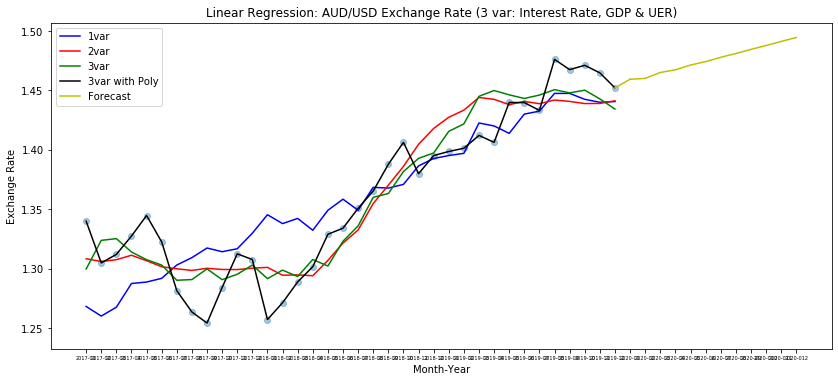

In [53]:
x_merge = ['2019-12', '2020-01']
y_merge = [y_pred[-1], forecast[0]]

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.plot(x_merge, y_merge, color='y')
plt.plot(month_year_future, forecast, color='y')
plt.legend(['1var', '2var', '3var', '3var with Poly', 'Forecast'])
plt.title("Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()